In [1]:
from ToFCIMSAnalysis.kmd import KMD
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Peaklist

### Load and run

Initialise the KMD object by providing the path and file name and hit .Run(). This prompts the user to input which kendrick bases the analysis should be performed on. It also asks for a pattern that all the unknown peaks are identified with - this is so these may be queried later

In [2]:
kmd = KMD("./tests/test_data/","test_peaklist.txt")
kmd.Run()

List your Kendrick bases: ch2 o2
Matching Peaks on kendrick base CH2
Matching Peaks on kendrick base O2
Updated peaklist written to updated_test_peaklist.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist.json


The matches are writen to a json file that can be read and queried to look for matches

In [3]:
match_data = pd.read_json("./tests/test_data/test_matched_id_data.json",orient="index")
match_data.loc['m132','CH2']

{u'C2H6ON': u'C4H10NO',
 u'm122': None,
 u'm132': None,
 u'm232': None,
 u'm332': None}

multiple KMD objects can be run on seperate peaklists

In [4]:
kmd2 = KMD("./tests/test_data/","test_peaklist2.txt")
kmd2.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist2.txt
Enter common pattern of unknown ion names: o2
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist2.json


In [5]:
kmd3 = KMD("./tests/test_data/","test_peaklist3.txt")
kmd3.Run()

List your Kendrick bases: ch2 o n
Matching Peaks on kendrick base CH2
Matching Peaks on kendrick base O
Matching Peaks on kendrick base N
Updated peaklist written to updated_test_peaklist3.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist3.json


### Element Distributions

We can extract the element distributions of the identified species in the peaklists and specify which elements we are interested in

In [6]:
d1 = kmd.ElementDistributions(kmd.peaklist.ion.values, ['C','H','O','N'])
d2 = kmd.ElementDistributions([x for x in kmd2.peaklist.ion.values if "unknown" not in x], ['C','H','O'])
d3 = kmd.ElementDistributions(kmd3.peaklist.ion.values, ['C','H','O'])
d1.head()

,C,H,O,N
0,23.0,23.0,23.0,25.0
1,0.0,0.0,3.0,2.0
2,3.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


These can then be plotted as frequency distributions. Up to 3 different peaklists can be compared on the same plot (more than 3 gets confusing to look at)

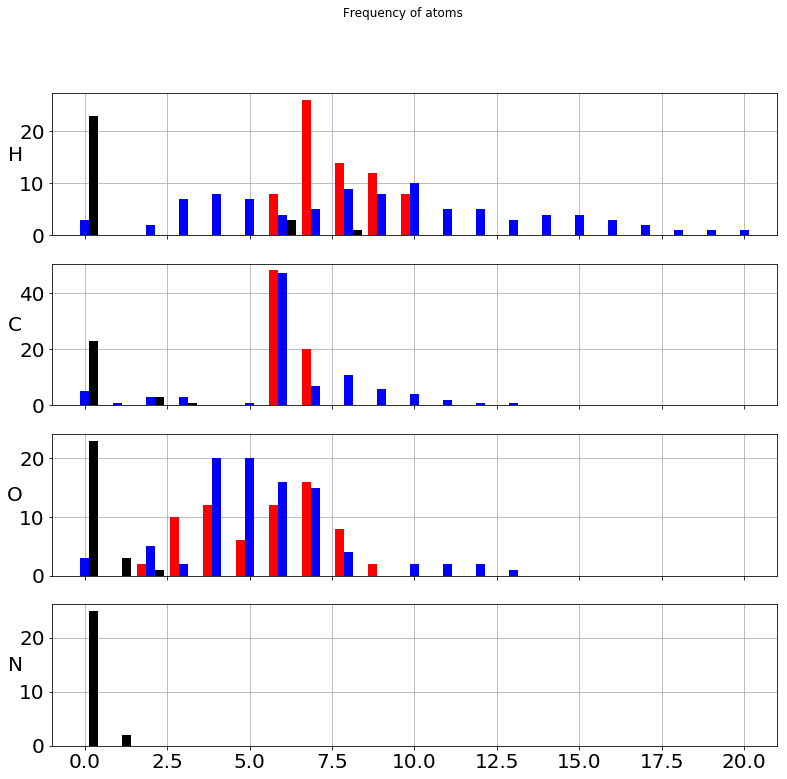

In [7]:
ax = kmd.ElementDistributionsPlot([d3, d2, d1])

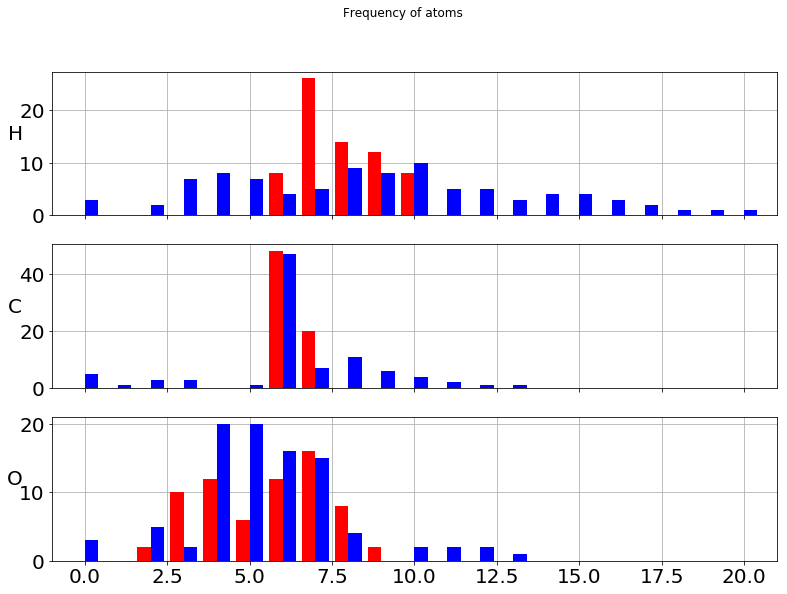

In [8]:
ax = kmd.ElementDistributionsPlot([d3, d2])

### Organic Characteristics

The organic characteristics of the identified species can also be calculated. These are the O:C, H:C, N:C and OSc.

In [10]:
org_characteristics = kmd.OrganicCharacteristics(kmd.peaklist.ion);
org_characteristics2 = kmd.OrganicCharacteristics(kmd2.peaklist.ion);
org_characteristics3 = kmd.OrganicCharacteristics(kmd3.peaklist.ion);
org_characteristics3.head()

,ion,I,H,C,O,N,O:C,H:C,N:C,OSc
0,IC6H7O3-,1,7,6,3,0,0.500000,1.166667,NaN,-0.2
1,IC6H8O3-,1,8,6,3,0,0.500000,1.333333,NaN,-0.3
2,IC6H6O2-,1,6,6,2,0,0.333333,1.000000,NaN,-0.3
3,IC6H7NO4-,1,7,6,4,1,0.666667,1.166667,0.166667,-0.7
4,IC7H9O7-,1,9,7,7,0,1.000000,1.285714,NaN,0.7


These can also be plotted.

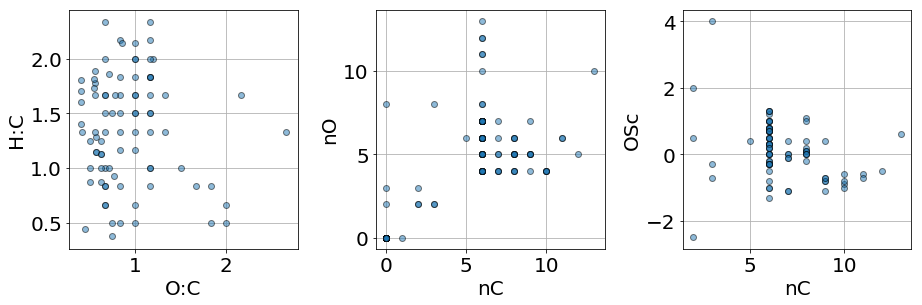

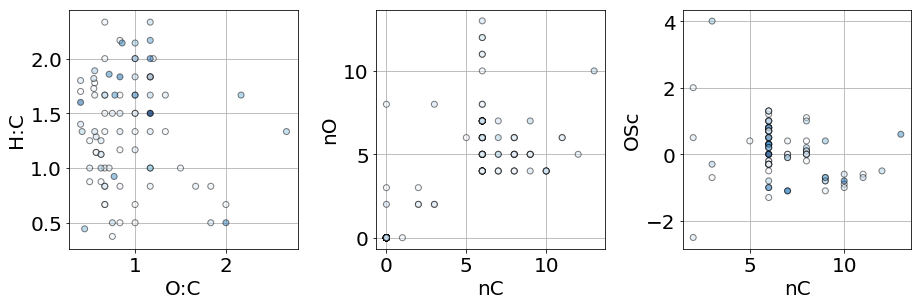

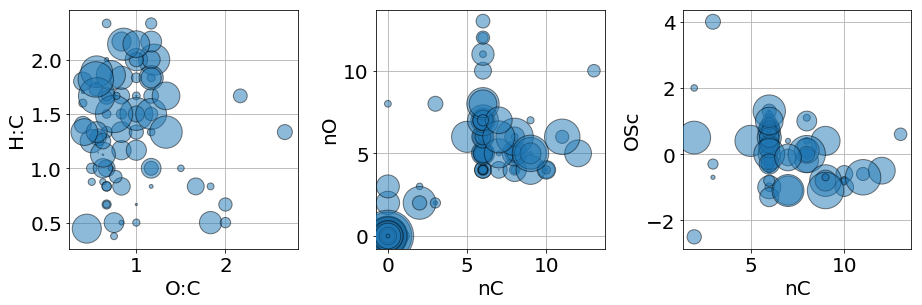

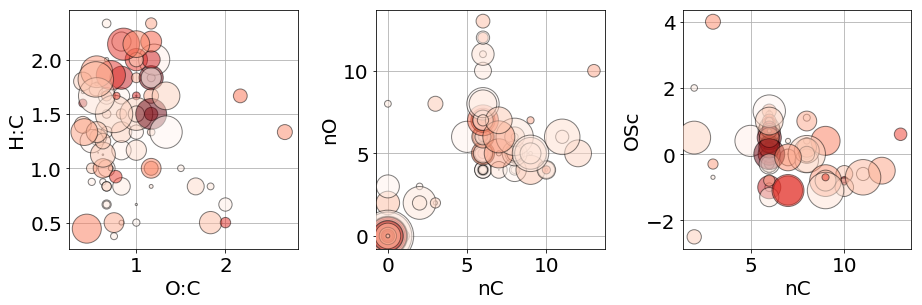

In [11]:
# generate random values. Here you could use peak intensity or something
alphas2 = [abs(x)*i for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]
sizes2 = [abs(x)*i*5 for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]

kmd.OrganicCharacteristicsPlot(org_characteristics2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, alphas=alphas2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, sizes=sizes2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, cmap="Reds", sizes=sizes2, alphas=alphas2);

## Time series

The package also contains a routine to count the different cycles

In [13]:
from ToFCIMSAnalysis.timeseries import TimeSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [14]:
ts = TimeSeries()
# data = pd.read_csv("../brazil1hzHRshort.csv", parse_dates=True, index_col="date:time")
data = pd.read_csv("tests/test_data/timeseries.csv", parse_dates=True, index_col="date:time")
data.head()

,temperature,state_name,m150,m151,m152,m153,m154,m155,m156,m157,...,m591,m592,m593,m594,m595,m596,m597,m598,m599,m600
date:time,,,,,,,,,,,,,,,,,,,,,
2015-10-11 11:10:54,62.04,0,126.879,35.8394,41.9620,18.9772,21.9177,165.993,13.3677,29.6979,...,6.76749,0.130209,1.17704,0.315099,1.16984,0.619629,1.20850,0.326151,2.15955,-0.058400
2015-10-11 11:11:24,56.35,0,133.269,39.3286,39.0736,17.4864,22.2083,161.082,18.6996,29.7746,...,7.60827,0.549669,1.34741,0.659218,1.08103,0.194152,1.43849,0.520368,2.75311,0.881759
2015-10-11 11:11:54,51.22,0,135.194,39.8157,43.2688,27.1620,25.3500,158.040,13.1785,30.5549,...,7.49901,1.732530,1.96174,0.716308,1.50135,0.632518,1.81397,0.395645,1.78711,0.634171
2015-10-11 11:12:24,46.79,0,134.460,37.7058,38.4336,22.7665,18.6913,153.271,16.8391,32.8211,...,6.41910,1.664120,1.94553,1.321940,1.90371,0.794163,2.10082,1.260640,2.92905,1.729330
2015-10-11 11:12:54,42.96,0,131.286,29.6331,39.5913,21.5025,21.1221,157.212,17.4272,29.7351,...,6.02088,1.539170,1.41683,0.754269,1.15849,0.298817,1.17376,0.307338,1.65594,0.286460


### Counting Cycles

Here you can see the figaero cycling in the 'state_name' column of the csv file.

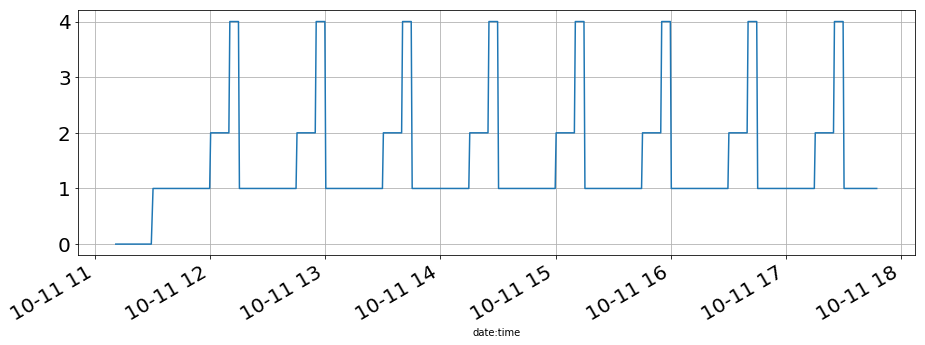

In [15]:
data['state_name'].plot(figsize=(15,5), grid=True);

 The CountCycles method counts the number of cycles within the 'state_name' columns and fills a new column with that count. In this instance it is called 'figaero_cycle'.

In [16]:
# data = ts.CountCycles(df=data,
#                       mask_column_name="state_name",
#                       new_cycle_column_name="figearo_cycle",
#                       last_num_in_seq=5.0,
#                       first_num_in_seq=1.0)
data = ts.CountCycles(df=data,
                      mask_column_name="state_name",
                      new_cycle_column_name="figearo_cycle",
                      last_num_in_seq=4,
                      first_num_in_seq=1)

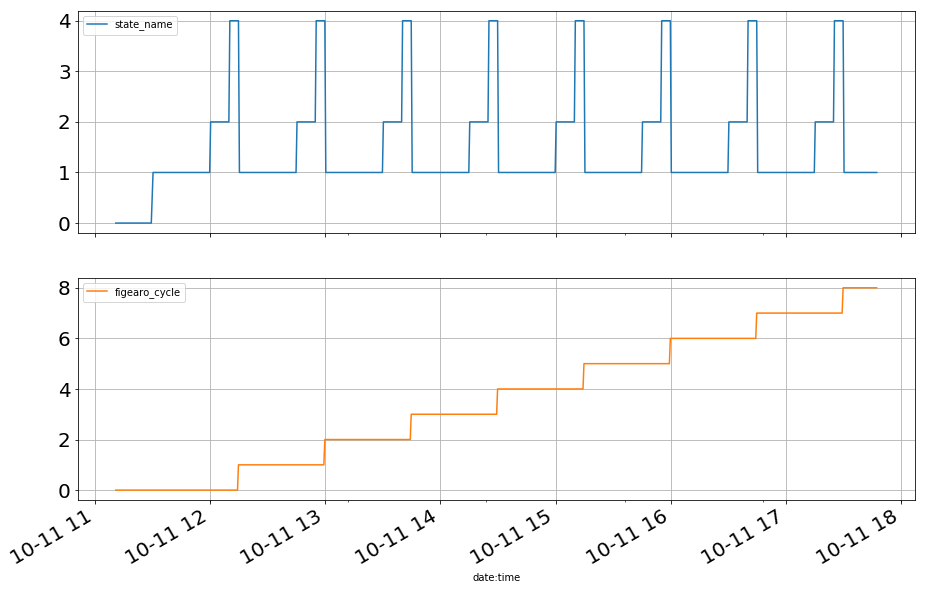

In [17]:
data[['state_name','figearo_cycle']].plot(figsize=(15,10), grid=True, subplots=True);

### Integrating particle data 

We use the counted cycles to identify where the integration for the figaero particle data should take place. 

In [18]:
# masses = [x for x in data.columns if "A_" in x and "particle_integrated" not in x]

# data = ts.IntegrateFIGAERO(df=data,
#                            columns_to_integrate=masses,
#                            mask_column_name='state_name',
#                            figaero_cycle_column_name="figearo_cycle",
#                            figaero_integrate_mask_val=[2, 4],
#                            gas_sample_mask_val=1, 
#                            bad_cycles=[14]);

masses = [x for x in data.columns if len(x) == 4]#[145:150]

data = ts.IntegrateFIGAERO(df=data,
                           columns_to_integrate=masses,
                           mask_column_name='state_name',
                           figaero_cycle_column_name="figearo_cycle",
                           figaero_integrate_mask_val=[2, 4],
                           gas_sample_mask_val=1, 
                           bad_cycles=[]);

100%|████████████████████████████████████████| 451/451 [00:20<00:00, 22.13it/s]


We can now visualise the integrated particle data with the gas data

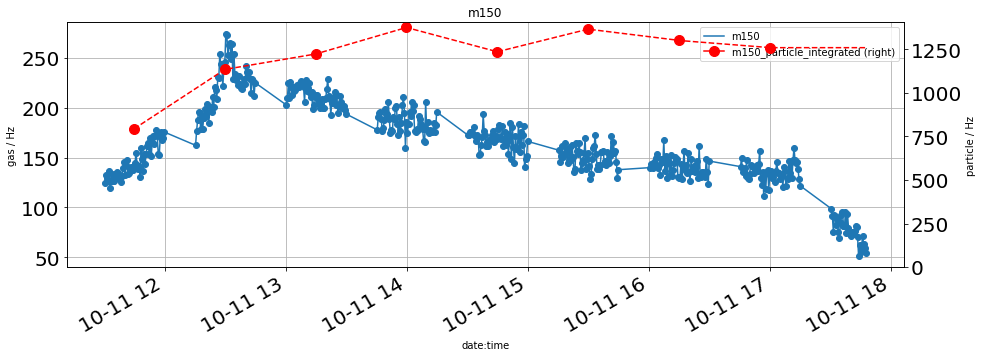

In [19]:
for mass in masses:
    ax = data.loc[(data["state_name"] == 1), mass].plot(marker="o", legend=True, figsize=(15,5));
    data[mass+"_particle_integrated"].interpolate().plot(ax=ax, ls="--", color="r", secondary_y=True);
    data[mass+"_particle_integrated"].plot(ax=ax, marker="o", markersize=10, color="r", secondary_y=True, legend=True, grid=True);
    ax.set_ylabel("gas / Hz");
    ax.right_ax.set_ylabel("particle / Hz");
    ax.right_ax.set_ylim(0,);
    ax.set_title(mass);
    plt.show();
    break

### Thermograms

Because we have temperature data we can plot thermograms of the different masses

In [20]:
mass = masses[0]
Temperature_data = data.loc[data['state_name'] == 2].set_index("temperature");
Temperature_data.head()

,state_name,m150,m151,m152,m153,m154,m155,m156,m157,m158,...,m591_particle_integrated,m592_particle_integrated,m593_particle_integrated,m594_particle_integrated,m595_particle_integrated,m596_particle_integrated,m597_particle_integrated,m598_particle_integrated,m599_particle_integrated,m600_particle_integrated
temperature,,,,,,,,,,,,,,,,,,,,,
24.97,2,33.4743,21.4911,25.0146,17.5906,24.1475,71.6662,13.3369,24.7700,9.27092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.83,2,32.7037,18.8725,14.8222,10.8395,14.9947,60.3381,13.1571,24.4389,13.18880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28.62,2,19.4143,14.2579,18.2801,11.3619,12.1238,69.3139,15.2234,24.9737,10.93000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.96,2,29.5924,21.3510,16.2496,15.6047,20.1019,74.7651,11.2271,37.8503,10.23670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.21,2,21.1331,14.8768,15.5963,20.7400,16.0214,101.9750,18.1446,61.4538,14.08940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To plot the thermograms, we're only interested during the desorption time

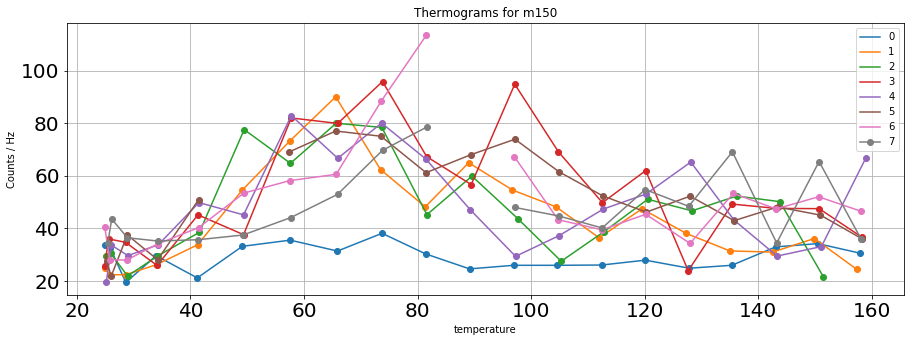

In [21]:
for mass in masses:
    for epoch in np.unique(data['figearo_cycle'])[:-1]:
        ax = Temperature_data.loc[(Temperature_data['figearo_cycle'] == epoch), mass].plot(
                                label=str(epoch), legend=True, marker="o", grid=True, figsize=(15,5));
    ax.set_ylabel("Counts / Hz");
    ax.set_title("Thermograms for "+mass);
    plt.show();
    break
del Temperature_data

We can extract the relevent thermogram data and store it in a dictionary of dataframes
(for now)

In [22]:
desorptions = ts.ExtractDesorptions(df=data,
                                    columns_to_extract=masses,
                                    mask_column_name="state_name",
                                    figaero_cycle_column_name="figearo_cycle",
                                    thermogram_mask_val=[2],
                                    temperature_dp=2,
                                    bad_cycles=[])

100%|████████████████████████████████████████| 451/451 [00:11<00:00, 40.72it/s]


In [23]:
desorptions[mass].head()

,0,1,2,3,4,5,6,7
temperature,,,,,,,,
24.0,33.4743,24.8083,NaN,25.8175,NaN,NaN,40.5798,NaN
26.0,32.7037,22.2931,30.00665,35.9784,26.5061,24.65985,28.0798,39.0215
28.0,19.4143,22.3883,21.86370,34.6711,29.6180,37.47190,27.8927,36.4005
34.0,29.5924,26.2009,29.64170,25.8842,33.7565,28.04210,34.0382,35.1768
42.0,21.1331,33.7205,38.47680,45.1089,49.7781,50.87190,40.2631,35.6563


We can plot each desorption cycles thermogram as well as their mean and standard deviation. This works best when the data is scaled.

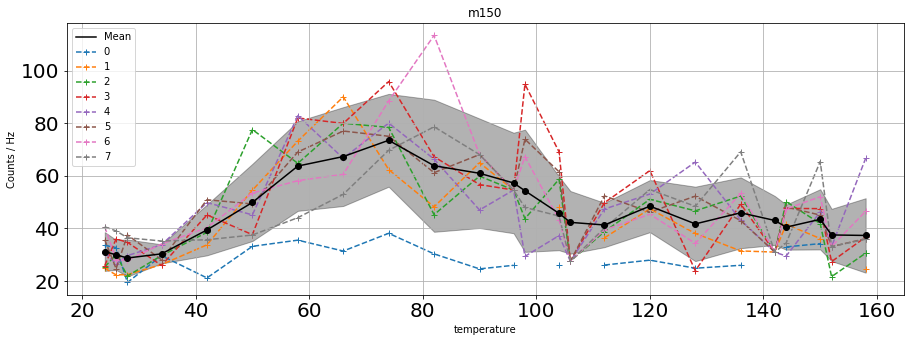

In [24]:
for mass in masses:
    ax = ts.PlotExtractDesorptions(desorptions[mass], figaero_cycles_to_plot=[0,1,2,3,4,5,6,7]);
    ax.set_title(mass);
    plt.show();
    break

Because the thermograms have different signal responses, it is best to normalise the signal in order to best assess the shape (and extract the tmax)

In [25]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [26]:
desorptions_SS = {}
for mass in tqdm(masses):
    desorptions_SS[mass] = pd.DataFrame(min_max_scaler.fit_transform(desorptions[mass]),
                                     columns=desorptions[mass].columns,
                                     index=desorptions[mass].index)

100%|███████████████████████████████████████| 451/451 [00:00<00:00, 826.01it/s]


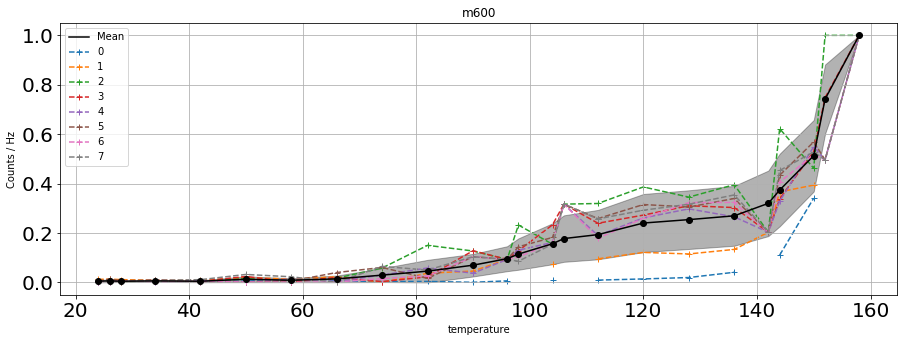

In [27]:
ax1 = ts.PlotExtractDesorptions(desorptions_SS[mass], figaero_cycles_to_plot=[0,1,2,3,4,5,6,7]);
ax1.set_title(mass);

### Extract Tmax
We can also extract TMax data...

In [28]:
tmaxes = ts.GetTMaxes(data, 
                      columns_to_get_tmax=masses,
                      thermogram_mask_val=[2,4], 
                      mask_column_name="state_name",
                      figaero_cycle_column_name="figearo_cycle",
                      temperature_column_name="temperature",
                      bad_cycles=[]
                      );
tmaxes

100%|████████████████████████████████████████| 451/451 [00:13<00:00, 34.40it/s]


,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,...,m591,m592,m593,m594,m595,m596,m597,m598,m599,m600
figearo_cycle,,,,,,,,,,,,,,,,,,,,,
0,164.21,164.21,NaN,NaN,157.92,65.90,157.92,57.57,NaN,65.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65.58,73.48,157.32,57.49,163.51,81.36,73.48,65.58,104.37,73.48,...,163.51,163.51,163.51,163.51,163.51,163.51,163.51,163.51,163.51,163.51
2,65.67,81.65,89.58,65.67,165.12,81.65,81.65,81.65,73.71,81.65,...,165.12,165.12,165.12,165.12,165.12,165.12,165.12,165.12,165.12,165.12
3,73.83,81.62,73.83,89.45,89.45,81.62,73.83,89.45,97.12,73.83,...,164.57,164.57,164.57,164.57,164.57,164.57,164.57,164.57,164.57,164.57
4,57.77,73.66,165.16,73.66,143.32,81.48,89.32,97.26,89.32,73.66,...,165.16,165.16,165.16,165.16,165.16,165.16,165.16,165.16,165.16,165.16
5,65.59,73.56,97.16,97.16,97.16,81.50,81.50,97.16,112.62,81.50,...,164.56,164.56,164.56,164.56,164.56,164.56,164.56,164.56,164.56,164.56
6,81.53,81.53,73.63,81.53,NaN,NaN,NaN,NaN,81.53,73.63,...,164.44,164.44,164.44,164.44,164.44,164.44,164.44,164.44,164.44,164.44
7,81.72,65.91,158.12,97.15,NaN,81.72,NaN,NaN,104.91,73.84,...,164.35,164.35,164.35,164.35,164.35,164.35,164.35,164.35,164.35,164.35


...then do some stats

In [29]:
tmax_stats = tmaxes.describe()
tmax_stats

,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,...,m591,m592,m593,m594,m595,m596,m597,m598,m599,m600
count,8.000000,8.000000,7.000000,7.000000,6.000000,7.000000,6.000000,6.000000,7.000000,8.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,81.987500,86.952500,116.400000,80.301429,136.080000,79.318571,92.950000,81.445000,94.797143,74.686250,...,164.530000,164.530000,164.530000,164.530000,164.530000,164.530000,164.530000,164.530000,164.530000,164.530000
std,34.264095,31.701784,41.879809,15.447978,34.100595,5.918261,32.365802,16.630763,13.950168,5.031222,...,0.552027,0.552027,0.552027,0.552027,0.552027,0.552027,0.552027,0.552027,0.552027,0.552027
min,57.770000,65.910000,73.630000,57.490000,89.450000,65.900000,73.480000,57.570000,73.710000,65.900000,...,163.510000,163.510000,163.510000,163.510000,163.510000,163.510000,163.510000,163.510000,163.510000,163.510000
25%,65.587500,73.540000,81.705000,69.665000,108.700000,81.420000,75.747500,69.597500,85.425000,73.592500,...,164.395000,164.395000,164.395000,164.395000,164.395000,164.395000,164.395000,164.395000,164.395000,164.395000
50%,69.750000,77.595000,97.160000,81.530000,150.620000,81.500000,81.575000,85.550000,97.120000,73.745000,...,164.560000,164.560000,164.560000,164.560000,164.560000,164.560000,164.560000,164.560000,164.560000,164.560000
75%,81.577500,81.627500,157.720000,93.300000,162.112500,81.635000,87.402500,95.232500,104.640000,75.755000,...,164.845000,164.845000,164.845000,164.845000,164.845000,164.845000,164.845000,164.845000,164.845000,164.845000
max,164.210000,164.210000,165.160000,97.160000,165.120000,81.720000,157.920000,97.260000,112.620000,81.650000,...,165.160000,165.160000,165.160000,165.160000,165.160000,165.160000,165.160000,165.160000,165.160000,165.160000


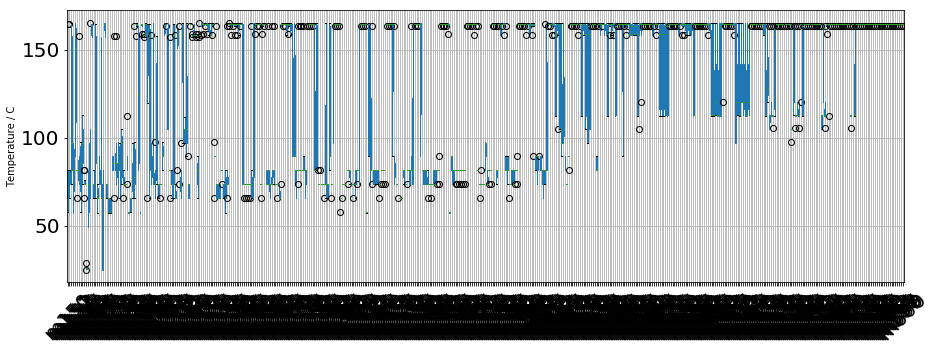

In [30]:
ax = tmaxes[tmaxes.columns].boxplot(figsize=(15,5));
ax.set_ylabel("Temperature / C");
ax.xaxis.set_tick_params(rotation=45);

### Cluster analysis

#### Thermograms

Now we have some worked up data we can begin to group them into clusters where behaviours are similar. This applied to both the thermograms and the time series

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn import metrics
min_max_scaler = preprocessing.MinMaxScaler()

first initalise some variables including those for the metric/scores to go in.

In [55]:
clusters=[2,3,4,5,6,7,8,9,10]
CH_score_normal_traces=[]
CH_score_vector_space=[]

extract the mean thermogram for each mass and put into an array. Then manipulate these data
by normalising to the sum of all values or scaling with normalize.

In [21]:
thermogram_means = np.array([desorptions[mass].interpolate().mean(axis=1).values for mass in masses])
thermogram_means = thermogram_means[np.isfinite(thermogram_means).all(axis=1)]

normal_traces = thermogram_means/np.nansum(thermogram_means,axis=1)[:,None]
vector_space_traces = preprocessing.normalize(thermogram_means, norm='l2')

Now train the AgglomerativeClustering model on a number of different clusters and the two differently pre-processed datasets.

In [22]:
# Now use clustering techniques on the pre-processed data
# Note there are many permutations to cluster techniques. You might need to try a
# a few. It helps to know what a good metric for similarity is and then define
# a useful 'distance'
for cluster_number in tqdm(clusters):
    model = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=cluster_number)
    #1) Using normalised trace data
    model.fit(normal_traces)
    labels = model.labels_
    score = metrics.calinski_harabaz_score(normal_traces, labels)  
#     print("CH score = %.3f for %d clusters for normalised data." % (score, cluster_number))
    CH_score_normal_traces.append(score)
    #2) Using vector space transformation
    model.fit(vector_space_traces)
    labels = model.labels_
    score = metrics.calinski_harabaz_score(vector_space_traces, labels)  
#     print("CH score = %.3f for %d clusters for vector space data." % (score, cluster_number))
    CH_score_vector_space.append(score)    

Plot the metric data to see which pre-processing technique and number of clusters worked best

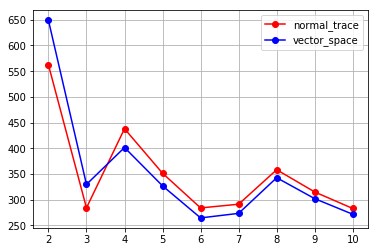

In [23]:
plt.plot(clusters, CH_score_normal_traces,'ro-', label="normal_trace");
plt.plot(clusters, CH_score_vector_space,'bo-', label="vector_space");
plt.grid();
plt.legend();

Looks like the best model is either; 2 clusters using the vector space pre-processing or,  4 clusters using the normal_trace pre-processing

In [28]:
model_2_V = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2);
model_4_N = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=4);
model_8_N = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=8);

model_2_V.fit(vector_space_traces);
model_4_N.fit(normal_traces);
model_8_N.fit(normal_traces);

labels_2_V = model_2_V.labels_
labels_4_N = model_4_N.labels_
labels_8_N = model_8_N.labels_

100%|███████████████████████████████████████| 451/451 [00:02<00:00, 209.48it/s]


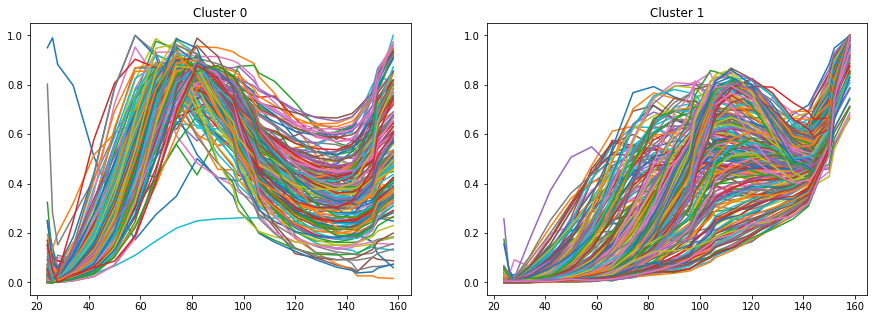

In [27]:
fig, ax = plt.subplots(ncols=2,  figsize=(15,5));

for cluster, mass in tqdm(zip(labels_4_N, masses)):
    if cluster == 0:
        axloc = (0)
    elif cluster == 1:
        axloc = (1)

    ax[axloc].plot(desorptions_SS[mass].interpolate().mean(axis=1));

ax[0].set_title("Cluster 0");
ax[1].set_title("Cluster 1");

100%|███████████████████████████████████████| 451/451 [00:02<00:00, 215.79it/s]


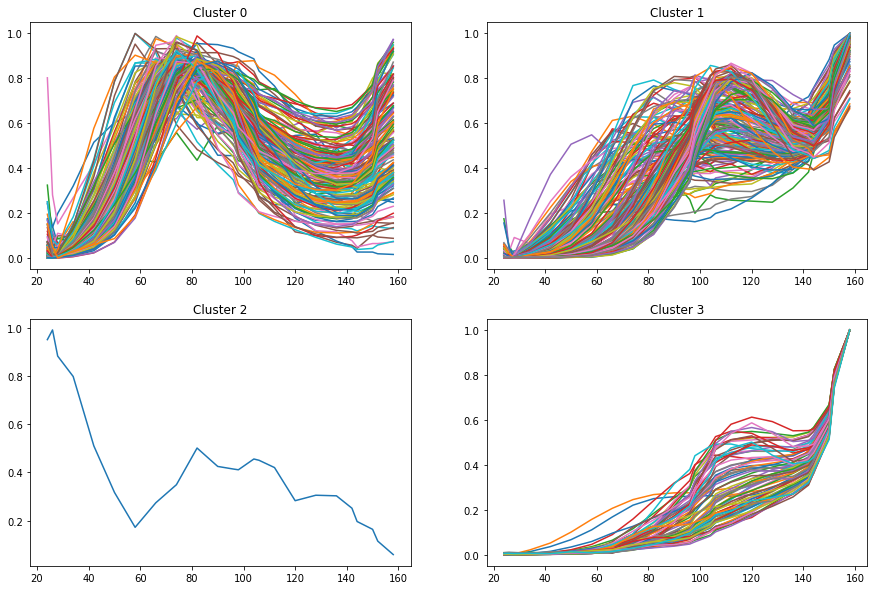

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

for cluster, mass in tqdm(zip(labels_4_N, masses)):
    if cluster == 0:
        axloc = (0,0)
    elif cluster == 1:
        axloc = (0,1)
    elif cluster == 2:
        axloc = (1,0)
    else:
        axloc = (1,1)
        
    ax[axloc].plot(desorptions_SS[mass].interpolate().mean(axis=1));

ax[0,0].set_title("Cluster 0");
ax[0,1].set_title("Cluster 1");
ax[1,0].set_title("Cluster 2");
ax[1,1].set_title("Cluster 3");

100%|███████████████████████████████████████| 451/451 [00:01<00:00, 249.17it/s]


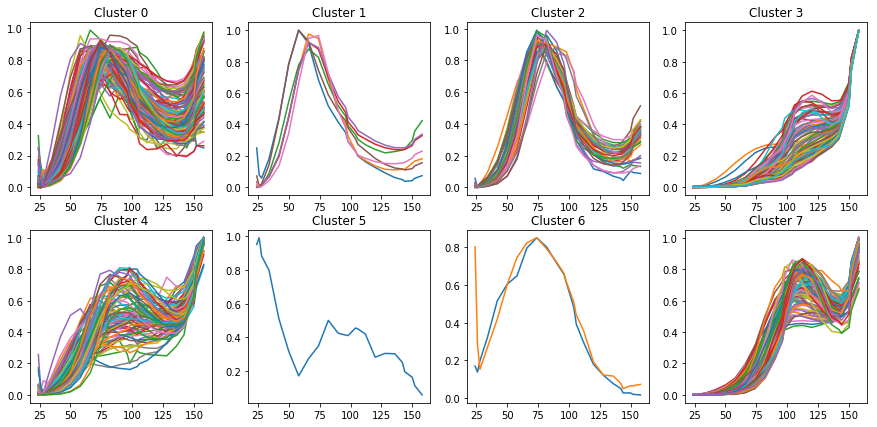

In [33]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7))

for cluster, mass in tqdm(zip(labels_8_N, masses)):
    if cluster == 0:
        axloc = (0,0)
    elif cluster == 1:
        axloc = (0,1)
    elif cluster == 2:
        axloc = (0,2)
    elif cluster == 3:
        axloc = (0,3)
    elif cluster == 4:
        axloc = (1,0)
    elif cluster == 5:
        axloc = (1,1)
    elif cluster == 6:
        axloc = (1,2)
    elif cluster == 7:
        axloc = (1,3)
    else:
        pass

    ax[axloc].plot(desorptions_SS[mass].interpolate().mean(axis=1));

ax[0,0].set_title("Cluster 0");
ax[0,1].set_title("Cluster 1");
ax[0,2].set_title("Cluster 2");
ax[0,3].set_title("Cluster 3");
ax[1,0].set_title("Cluster 4");
ax[1,1].set_title("Cluster 5");
ax[1,2].set_title("Cluster 6");
ax[1,3].set_title("Cluster 7");

#### Time series
Repeat again but for the time series data. Because we have figaero data, we can work on either the raw time series data, the gas phase only data and the particle phase only data.

In [15]:
# This separates particle and gas phase data and scales then using a standard scaler, scales
# all data to between 0 - 1.
particle_columns = [x for x in data.columns if "particle_integrated" in x]
gas_columns = [x for x in data.columns if len(x) == 4]

particle_SS = pd.DataFrame(data = min_max_scaler.fit_transform(data[particle_columns].values),
                           columns = data[particle_columns].columns,
                           index = data[particle_columns].index)
particle_normal = pd.DataFrame(data = data[particle_columns].values/np.nansum(data[particle_columns].values, axis=1)[:,None],
                           columns = data[particle_columns].columns,
                           index = data[particle_columns].index)
dat = data[particle_columns].values
dat = dat[np.isfinite(dat).all(axis=1)]
particle_l2 = pd.DataFrame(data =  preprocessing.normalize(dat, norm='l2'),
                           columns = data[particle_columns].columns)
particle_SS.dropna(inplace=True)
particle_normal.dropna(inplace=True)
particle_l2.dropna(inplace=True)

gas_SS = pd.DataFrame(data = min_max_scaler.fit_transform(data.loc[(data["state_name"] == 1), gas_columns].values),
                      columns = data.loc[(data["state_name"] == 1), gas_columns].columns,
                      index = data.loc[(data["state_name"] == 1), gas_columns].index)
gas_normal = pd.DataFrame(data = data.loc[(data["state_name"] == 1), gas_columns].values/np.nansum(data.loc[(data["state_name"] == 1), gas_columns].values,axis=1)[:,None],
                          columns = data.loc[(data["state_name"] == 1), gas_columns].columns,
                          index = data.loc[(data["state_name"] == 1), gas_columns].index)
dat = data.loc[(data["state_name"] == 1), gas_columns].values
dat = dat[np.isfinite(dat).all(axis=1)]
gas_l2 = pd.DataFrame(data = preprocessing.normalize(dat, norm='l2'),
                      columns = data.loc[(data["state_name"] == 1), gas_columns].columns)
gas_SS.dropna(inplace=True)
gas_normal.dropna(inplace=True)
gas_l2.dropna(inplace=True)

In [36]:
#  Now use clustering techniques on the pre-processed data
# Note there are many permutations to cluster techniques. You might need to try a
# a few. It helps to know what a good metric for similarity is and then define
# a useful 'distance'
P_clusters=[2,3,4,5,6,7]
CH_score_p_s = []
CH_score_p_n = []
CH_score_p_l2 = []

for cluster_number in tqdm(P_clusters):
    model = AgglomerativeClustering(linkage='average',
                                    affinity='cosine',
                                    n_clusters=cluster_number)

    model.fit(particle_SS.values)
    labels_p_ss = model.labels_
    score = metrics.calinski_harabaz_score(particle_SS.values, labels_p_ss)  
    CH_score_p_s.append(score)    

    model.fit(particle_normal.values)
    labels_p_n = model.labels_
    score = metrics.calinski_harabaz_score(particle_normal.values, labels_p_n)  
    CH_score_p_n.append(score)    

    model.fit(particle_l2.values)
    labels_p_l2 = model.labels_
    score = metrics.calinski_harabaz_score(particle_l2.values, labels_p_l2)  
    CH_score_p_l2.append(score)    
 

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 187.50it/s]


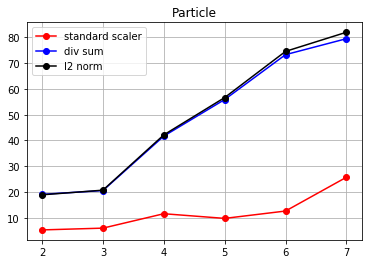

In [37]:
plt.plot(P_clusters, CH_score_p_s, 'ro-', label="standard scaler");
plt.plot(P_clusters, CH_score_p_n, 'bo-', label="div sum");
plt.plot(P_clusters, CH_score_p_l2, 'ko-', label="l2 norm");
plt.grid();
plt.title("Particle");
plt.legend();
plt.show();

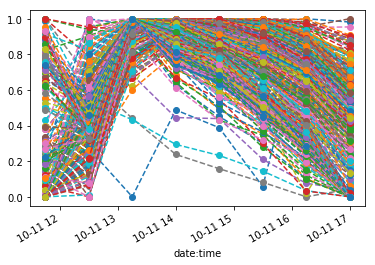

In [93]:
particle_SS.plot(legend=False,marker="o",ls="--")

In [38]:
G_clusters=[2,3,4,5,6,7,8,9,10]

CH_score_g_s = []
CH_score_g_n = []
CH_score_g_l2 = []

for cluster_number in tqdm(G_clusters):

    model = AgglomerativeClustering(linkage='average',
                                    affinity='cosine',
                                    n_clusters=cluster_number)

    model.fit(gas_SS.values)
    labels_g_ss = model.labels_
    score = metrics.calinski_harabaz_score(gas_SS.values, labels_g_ss)  
    CH_score_g_s.append(score)    

    model.fit(gas_normal.values)
    labels_g_n = model.labels_
    score = metrics.calinski_harabaz_score(gas_normal.values, labels_g_n)  
    CH_score_g_n.append(score)    

    model.fit(gas_l2.values)
    labels_g_l2 = model.labels_
    score = metrics.calinski_harabaz_score(gas_l2.values, labels_g_l2)  
    CH_score_g_l2.append(score)   

100%|████████████████████████████████████████████| 9/9 [00:02<00:00,  4.27it/s]


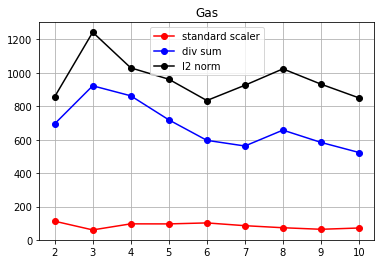

In [40]:
plt.plot(G_clusters, CH_score_g_s, 'ro-', label="standard scaler");
plt.plot(G_clusters, CH_score_g_n, 'bo-', label="div sum");
plt.plot(G_clusters, CH_score_g_l2, 'ko-', label="l2 norm");
plt.grid();
plt.title("Gas");
plt.legend();

In [84]:
p_model = AgglomerativeClustering(linkage='average',
                                    affinity='cosine',
                                    n_clusters=7).fit(particle_l2.values)
g_model = AgglomerativeClustering(linkage='average',
                                    affinity='cosine',
                                    n_clusters=3).fit(gas_l2.values)

100%|████████████████████████████████████████| 451/451 [00:06<00:00, 71.03it/s]


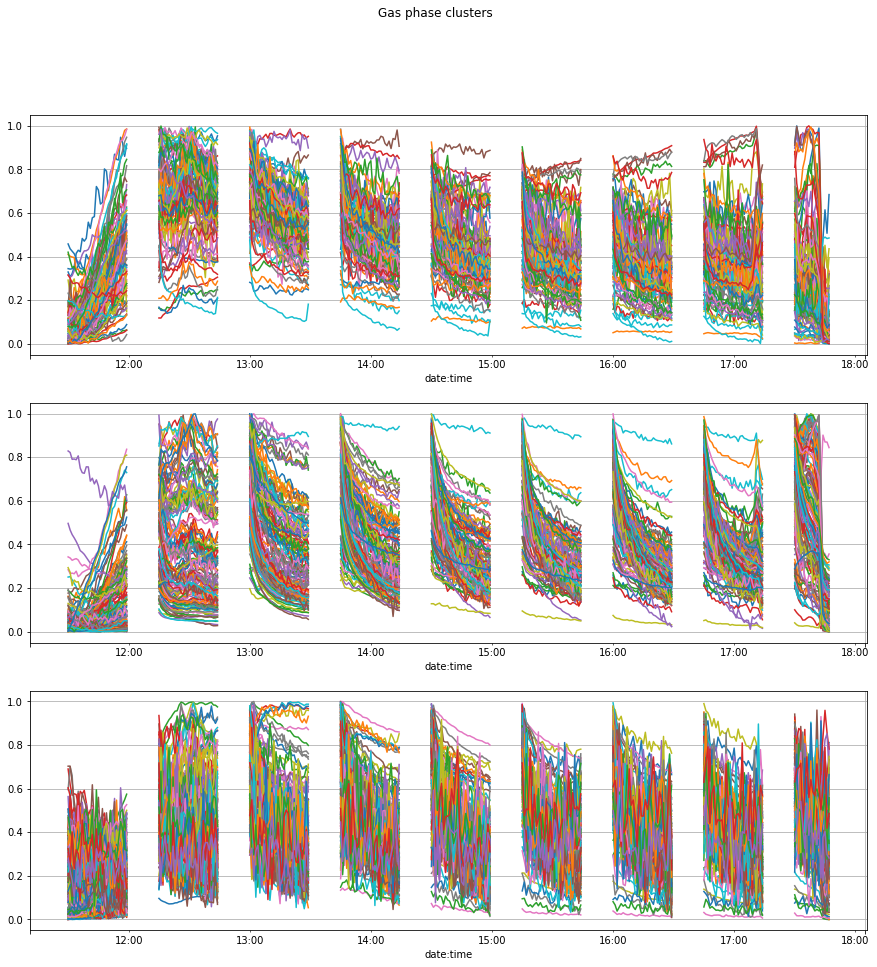

In [86]:
fig, ax = plt.subplots(nrows=3,  figsize=(15,15));

for cluster, mass in tqdm(zip(g_model.labels_, gas_columns)):
    gas_SS[mass].resample("1min").mean().plot(ax=ax[cluster], legend=False, grid=True);
plt.suptitle("Gas phase clusters");

In [ ]:
none linear PCA 
kernal PCA